In [311]:
import os
os.environ['USE_PYGEOS'] = '0'
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx 
from shapely.geometry import Point, LineString
from shapely import distance
import numpy as np

In [312]:
main_folder_path =os.path.normpath(os.getcwd() + os.sep + os.pardir)
df =pd.read_csv(main_folder_path+"\\data\\_roads3.csv")

In [313]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lon, df.lat), crs="EPSG:4326")

In [314]:
road_names =gdf["road"].unique()
road_names_N1=[road for road in road_names if road.startswith("N")]
# print(road_names)
line_dict = {}
for road_name in road_names_N1:
    # if road_name.startswith('N'):
    bridges_road = gdf[gdf["road"] == road_name]
        # bridges_road=bridges_road.sort_ values(by=['km'])
    if len(bridges_road["geometry"]) >= 2:
            
        line_dict[road_name] =LineString(bridges_road["geometry"])
        

gseries =gpd.GeoSeries(line_dict.values(), index=line_dict.keys(), crs=4326)
    

In [315]:
cross_index_N1=[]
for index in gseries.index:
    if gseries["N1"].intersects(gseries[index]):
        cross_index_N1.append(index)
cross_index_N2=[]
for index in gseries.index:
    if gseries["N2"].intersects(gseries[index]):
        cross_index_N2.append(index)

intersecting_N1 =gseries[gseries.index.isin(cross_index_N1)]
intersecting_N2 =gseries[gseries.index.isin(cross_index_N2)]

intersections_N1 =gseries["N1"].intersection(intersecting_N1).drop("N1")
intersections_N2 =gseries["N2"].intersection(intersecting_N2).drop("N2")

gdf_N1 =gdf[gdf["road"]=="N1"]
gdf_N2 =gdf[gdf["road"]=="N2"]

In [316]:
print(len(intersections_N1),len(intersections_N2))

6 4


In [324]:
df_list =[]
index_list = []
closest_points=[]
for gdf_data, intersect_data in [[gdf_N1,intersections_N1],[gdf_N2,intersections_N2]]:
    for intersect_index_N1 in intersect_data.index:
        intersect_point_N1 =intersect_data[intersect_index_N1]
        min_dist =10000
        for N1_index in gdf_data.index:
            N1_pont =gdf_data.loc[N1_index,"geometry"]
            dist =distance(gdf_data.loc[N1_index,"geometry"],intersect_point_N1)
            if  dist< min_dist:
                min_dist = dist
                closest_point =N1_index
        index_list.append(intersect_index_N1)   
        closest_points.append(closest_point)
        
# df_list.append(gdf[gdf.index.isin(closest_points)])
df_intersections_main = pd.concat(df_list, axis=0, ignore_index=True)
df_intersections_main["intersec_to"]=index_list
df_intersections_main["type"] = "intersection"


df_intersections_main.to_csv(main_folder_path+"\\data\\intersections_main.csv")

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "GeoDataFrame"

In [326]:
index_list

['N102', 'N104', 'N112', 'N120', 'N129', 'N2', 'N1', 'N105', 'N203', 'N209']

In [325]:
closest_points

[185, 335, 332, 221, 517, 17, 2346, 2365, 2535, 3071]

In [318]:
df_list = []
for road_name in intersections_N1.index:
    road_gdf = gdf[gdf["road"]==road_name]
    intersect_point_N1 =intersections_N1[road_name]
    min_dist=10000
    for road_point_index in road_gdf.index:
        road_point =road_gdf.loc[road_point_index,"geometry"]
        dist =distance(intersect_point_N1,road_point)
        if  dist< min_dist:
            min_dist = dist
            closest_point =road_point_index
    df_list.append(road_gdf[road_gdf.index == closest_point])
    
for road_name in intersections_N2.index:
    road_gdf = gdf[gdf["road"]==road_name]
    intersect_point_N2 =intersections_N2[road_name]
    min_dist=10000
    for road_point_index in road_gdf.index:
        road_point =road_gdf.loc[road_point_index,"geometry"]
        dist =distance(intersect_point_N2,road_point)
        if  dist< min_dist:
            min_dist = dist
            closest_point =road_point_index
    df_list.append(road_gdf[road_gdf.index == closest_point])  
    
df_intersections_side = pd.concat(df_list, axis=0, ignore_index=True)
df_intersections_side["type"]= "intersection"

df_intersections_side.to_csv(main_folder_path+"\\data\\intersections_side.csv")

<Axes: >

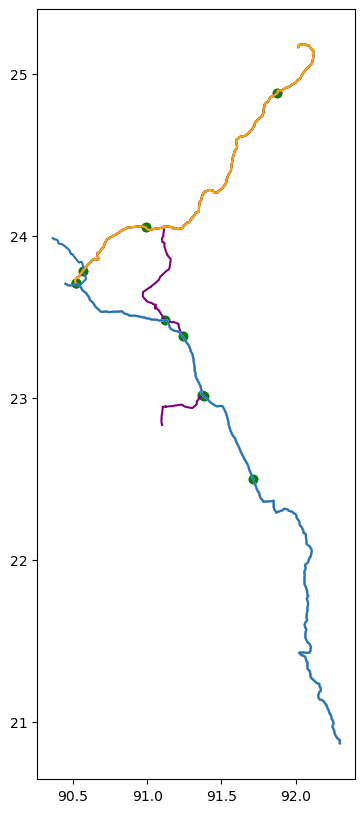

In [319]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

Intersecting_1 =[line for line in gseries if gseries["N1"].intersects(line)]
intersections_1 =gseries["N1"].intersection(Intersecting_1)

# Intersecting =[line for line in gseries if gseries["N1"].intersects(line)]
# intersections =gseries["N1"].intersection(Intersecting)

# fig, ax = plt.subplots(1,1,figsize=(10,10))
gpd.GeoSeries(Intersecting_1, crs=4326).plot(ax=ax,color="purple")
gpd.GeoSeries(intersections_1, crs=4326).plot(ax=ax)
gpd.GeoSeries(gseries["N1"],crs=4326).plot(ax=ax,color="white")




Intersecting =[line for line in gseries if gseries["N2"].intersects(line)]
intersections =gseries["N2"].intersection(Intersecting)


gpd.GeoSeries(intersections, crs=4326).plot(ax=ax,color="red")
gpd.GeoSeries(Intersecting, crs=4326).plot(ax=ax)
gpd.GeoSeries(gseries["N2"],crs=4326).plot(ax=ax,color="orange")

gpd.GeoSeries(df_intersections["geometry"], crs=4326).plot(ax=ax,color="green")